# Benford's law
Benford's law states that in listings, tables of statistics, etc., the digit 1 tends to occur as a leading digit with probability ~30%, much greater than the expected 11.1% (i.e., one digit out of 9).

A set of numbers is said to satisfy Benford's law if the leading digit d (d ∈ {1, ..., 9}) occurs with probability:

$$ P(d)=\log _{10}(d+1)-\log _{10}(d)=\log _{10}\left({\frac {d+1}{d}}\right)=\log _{10}\left(1+{\frac {1}{d}}\right) $$

Numerically, the leading digits have the following distribution in Benford's law, where d is the leading digit and P (d ) the probability:

In [3]:
from math import log

bl = []

print("d | P(d)")

for d in range(1, 10):
    
    probD = log(d + 1, 10) - log(d, 10)
    
    probabilities = "{} | {}".format(d, round(probD, 3))

    bl.append(probD)
    
    print(probabilities)


d | P(d)
1 | 0.301
2 | 0.176
3 | 0.125
4 | 0.097
5 | 0.079
6 | 0.067
7 | 0.058
8 | 0.051
9 | 0.046


Let us test a small sample, to see if the statement is true.
We can test this on a list $2^n$ [A008952](https://oeis.org/A008952).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def benford(numbers):
    
    # Now, let's make a list to hold the values of the first digits.
    stats = []
    first_digit = []
    
    for number in numbers:
        first_digit.append(int(str(number)[:1]))

    for d in range(1, 10):
        stats.append(first_digit.count(d) / len(first_digit))
    return stats

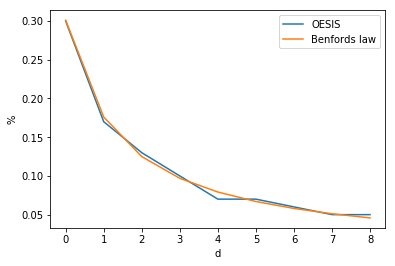

In [5]:
# Here is the sample data.
oesis = [2**n for n in range(100)]

# Here, we plot the results
plt.plot(benford(oesis))
plt.plot(bl)
plt.legend(('OESIS', 'Benfords law'))
plt.xlabel('d')
plt.ylabel('%')
plt.show()

## Application
With this knowledge, we can detect irregularities to a very high accuracy.

### Criteria for distributions expected and not expected to obey Benford's Law

A number of criteria—applicable particularly to accounting data—have been suggested where Benford's Law can be expected to apply and not to apply.

#### Distributions that can be expected to obey Benford's Law

* When the mean is greater than the median and the skew is positive
* Numbers that result from mathematical combination of numbers: e.g. quantity × price
* Transaction level data: e.g. disbursements, sales
* Numbers produced when doing any multiplicative calculations with an Oughtred slide rule, since the answers naturally * * fall into the right logarithmic distribution.

#### Distributions that would not be expected to obey Benford's Law

* Where numbers are assigned sequentially: e.g. check numbers, invoice numbers
* Where numbers are influenced by human thought: e.g. prices set by psychological thresholds (\$1.99)
* Accounts with a large number of firm-specific numbers: e.g. accounts set up to record $100 refunds
* Accounts with a built-in minimum or maximum
* Where no transaction is recorded

